In [27]:
tensor.unsqueeze(0).shape

torch.Size([1, 12, 4])

In [65]:
import torch

class RollingBufferKVCache:
    def __init__(self, max_batch_size, max_seq_len, n_kv_heads, head_dim, max_window):
        self.max_batch_size = max_batch_size
        self.max_seq_len = max_seq_len
        self.n_kv_heads = n_kv_heads
        self.head_dim = head_dim
        self.max_window = max_window

        self.cache_k = torch.zeros((max_batch_size, max_window, n_kv_heads, head_dim))
        self.cache_v = torch.zeros((max_batch_size, max_window, n_kv_heads, head_dim))

    def update_cache(self, xk, xv, batch_size, start_pos):
        cache_position = start_pos % self.max_window
        self.cache_k[:batch_size, cache_position:cache_position + 1] = xk
        self.cache_v[:batch_size, cache_position:cache_position + 1] = xv

    def retrieve_cache(self, batch_size, start_pos, seq_len):
        effective_start_pos = (start_pos + 1 - self.max_window) % self.max_window
        keys = torch.cat([
            self.cache_k[:batch_size, effective_start_pos:, :, :],
            self.cache_k[:batch_size, :effective_start_pos, :, :]
        ], dim=1)
        values = torch.cat([
            self.cache_v[:batch_size, effective_start_pos:, :, :],
            self.cache_v[:batch_size, :effective_start_pos, :, :]
        ], dim=1)

        keys = keys[:, -seq_len:, :, :]
        values = values[:, -seq_len:, :, :]
        return keys, values

# Initialize the rolling buffer KV cache
max_window = 4
cache = RollingBufferKVCache(max_batch_size=2, max_seq_len=10, n_kv_heads=2, head_dim=4, max_window=max_window)

# Define some example key-value pairs to update the cache
seq_len = 0
for i in range(10):
    xk = torch.randn(2, 1, 2, 4)  # shape (batch_size, 1, n_kv_heads, head_dim)
    xv = torch.randn(2, 1, 2, 4)
    # Update the cache at different positions and retrieve values
    print(f"Updating cache at position {seq_len} (should wrap around to position {seq_len % max_window})" )
    cache.update_cache(xk, xv, batch_size=2, start_pos=0)
    seq_len += 1
    k, v = cache.retrieve_cache(batch_size=2, start_pos=0, seq_len=seq_len)
    print("Retrieved key and value shape:", k.shape, v.shape)


Updating cache at position 0 (should wrap around to position 0)
Retrieved key and value shape: torch.Size([2, 1, 2, 4]) torch.Size([2, 1, 2, 4])
Updating cache at position 1 (should wrap around to position 1)
Retrieved key and value shape: torch.Size([2, 2, 2, 4]) torch.Size([2, 2, 2, 4])
Updating cache at position 2 (should wrap around to position 2)
Retrieved key and value shape: torch.Size([2, 3, 2, 4]) torch.Size([2, 3, 2, 4])
Updating cache at position 3 (should wrap around to position 3)
Retrieved key and value shape: torch.Size([2, 4, 2, 4]) torch.Size([2, 4, 2, 4])
Updating cache at position 4 (should wrap around to position 0)
Retrieved key and value shape: torch.Size([2, 4, 2, 4]) torch.Size([2, 4, 2, 4])
Updating cache at position 5 (should wrap around to position 1)
Retrieved key and value shape: torch.Size([2, 4, 2, 4]) torch.Size([2, 4, 2, 4])
Updating cache at position 6 (should wrap around to position 2)
Retrieved key and value shape: torch.Size([2, 4, 2, 4]) torch.Size

In [4]:
encoded_prompts = [[1, 2, 3, 1, 2, 5, 7], [4, 5, 6, 9, 4, 5, 6, 9]]
generated_sequences = generate(
    encoded_prompts=encoded_prompts,
    model=transformer,
    max_tokens=20,
    temperature=0.8,
    eos_id=None  # Replace with an appropriate eos_id if available
)

reach here 0 0 


AttributeError: 'BufferCache' object has no attribute 'mask'

In [5]:
# input_ids need to be a tensor of shape torch.Size([args.dim * args.max_batch_size])
# each entry need to be within range [0, args.vocab_size - 1]
input = torch.tensor([args.vocab_size - 1] * (args.dim * args.max_batch_size))
seqlens = [args.dim] * args.max_batch_size  # Assuming all sequences are of maximum length for simplicity
output = transformer(input, seqlens)

hshape torch.Size([2048, 128])


In [6]:
input.shape

torch.Size([2048])

In [7]:
output.shape

torch.Size([2048, 100])

In [8]:
pred = sample(output, temperature=0.8, top_p=0.9)

In [9]:
pred.shape

torch.Size([2048])

In [52]:
class DummyLindsey:
    def __init__(self, a, b):
        self.boob_left = a
        self.boob_right = b
    def get_boob(self):
        return self.boob_left, self.boob_right

In [53]:
stupid = DummyLindsey([1,2], [2,1])
l, r = stupid.get_boob()
print(l, r)

[1, 2] [2, 1]


In [54]:
def touch_boob(x):
    x[0] = 1000000 

In [55]:
touch_boob(l)

In [56]:
stupid.get_boob()

([1000000, 2], [2, 1])

In [60]:
import torch

# Initialize tensors
flat_cache_k = torch.zeros(2, 3)
xk = torch.randn(3, 3)
cache_positions = torch.tensor([1, 1, 1])

# Perform the index_copy_ operation
flat_cache_k.index_copy_(0, cache_positions, xk)

# Print the result
print("xk:\n", xk)
print("flat_cache_k after index_copy_:\n", flat_cache_k)
print("xk:\n", xk)
print("cache_positions:", cache_positions)

xk:
 tensor([[-0.2717, -0.6327, -0.3298],
        [ 0.2509,  0.0857,  0.3565],
        [-0.0105, -0.1245,  2.1463]])
flat_cache_k after index_copy_:
 tensor([[ 0.0000,  0.0000,  0.0000],
        [-0.0105, -0.1245,  2.1463]])
xk:
 tensor([[-0.2717, -0.6327, -0.3298],
        [ 0.2509,  0.0857,  0.3565],
        [-0.0105, -0.1245,  2.1463]])
cache_positions: tensor([1, 1, 1])


In [27]:
from graphviz import Digraph

def visualize_token_flow(tokens, attention_matrix):
    dot = Digraph(comment='Token Flow')

    # Adding nodes for each token
    for i, token in enumerate(tokens):
        dot.node(str(i), token)

    # Adding edges based on attention scores
    # Assuming attention_matrix is a square matrix with dimensions (len(tokens), len(tokens))
    for i in range(len(tokens)):
        for j in range(len(tokens)):
            # Add edges with labels of attention scores
            # Thresholding attention to avoid clutter, only show significant attention flows
            if attention_matrix[i][j] > 0.1:  # threshold can be adjusted
                dot.edge(str(j), str(i), label=f'{attention_matrix[i][j]:.2f}')

    print(dot.source)  # optionally print the DOT source code for debugging
    dot.render('token_flow', format='png', cleanup=True)
    return dot

// Token Flow
digraph {
	0 [label=Hello]
	1 [label=world]
	2 [label=this]
	3 [label=is]
	4 [label=a]
	5 [label=test]
	1 -> 0 [label=0.20]
	1 -> 1 [label=0.30]
	2 -> 2 [label=0.50]
	3 -> 2 [label=0.20]
	2 -> 3 [label=0.20]
	3 -> 3 [label=0.60]
	4 -> 4 [label=0.60]
	5 -> 5 [label=0.70]
}


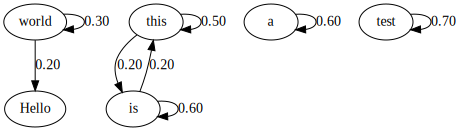

In [40]:
tokens = ['Hello', 'world', 'this', 'is', 'a', 'test']
# Example attention matrix (normally this should be output from a model)
attention_matrix = [
    [0.1, 0.2, 0, 0, 0, 0],
    [0.1, 0.3, 0, 0, 0, 0],
    [0, 0, 0.5, 0.2, 0.1, 0.1],
    [0, 0, 0.2, 0.6, 0.1, 0],
    [0, 0, 0.1, 0.1, 0.6, 0.1],
    [0, 0, 0, 0, 0.1, 0.7]
]
visualize_token_flow(tokens, attention_matrix)